In [2]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Visualization_helpers import *

2024-10-16 09:33:42.015188: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 09:33:42.020046: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 09:33:42.033464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 09:33:42.055144: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 09:33:42.061436: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 09:33:42.078361: I tensorflow/core/platform/cpu_feature_gu

# Baseline Visualization

In [6]:
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/RegressionData/BaselineData.csv")
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
311,ConcreteSlumpTest,even,5,-0.336883,-0.369890
333,ConcreteSlumpTest,skewed,11,-0.338558,-0.313320
349,ConcreteSlumpTest,turn,29,-0.057563,-0.057563
501,IstanbulStock,distort,13,0.698511,0.699323
47,AirfoilSelfNoise,turn,219,-0.419872,-0.419872


In [39]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
baselines_grouped

,csv_file,split,A_Classification_Score,B_Classification_Score
0,AirfoilSelfNoise,distort,0.875245,0.891830
1,AirfoilSelfNoise,even,-0.099397,-0.095991
2,AirfoilSelfNoise,random,-0.104496,-0.115598
3,AirfoilSelfNoise,skewed,-0.137537,-0.202338
4,AirfoilSelfNoise,turn,-0.354418,-0.354418
...,...,...,...,...
65,SML2010,distort,0.989443,0.988617
66,SML2010,even,-0.198643,-0.105772
67,SML2010,random,-0.250462,0.176966
68,SML2010,skewed,-0.107237,-0.034869


<Axes: xlabel='csv_file'>

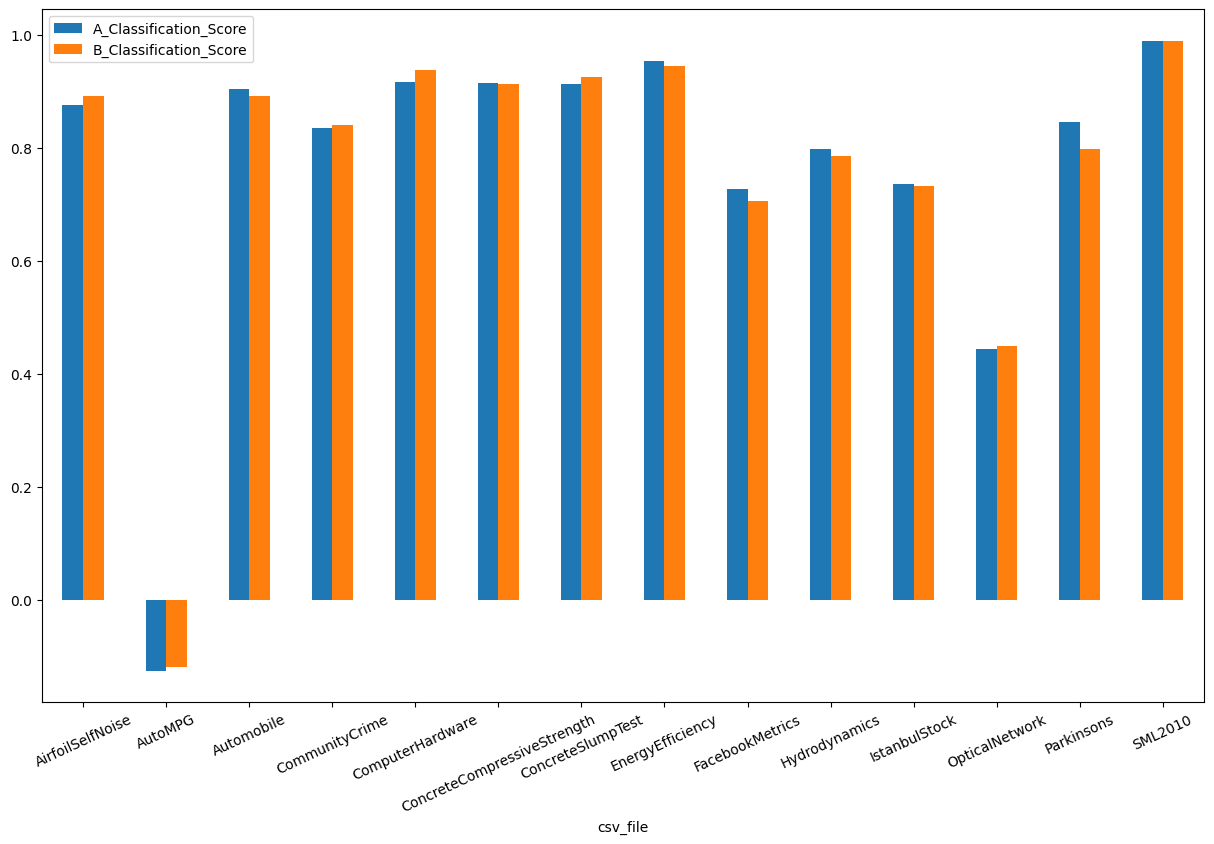

In [53]:
baselines_grouped[baselines_grouped["split"] == "distort"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)
#Keep in mind that these are trained on one domain, then tested on the other. 